In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
import math
from matplotlib import patheffects
from scipy.optimize import minimize


# Problem 1: Schmit truss problem
Author: Donglai Yang

This notebook contains the code, equations, and responses to all the questions in assignment 1. The markdown cells should be self-explanatory.

### Part (a)
"Show a plot that has both the contour lines of the objective and the constraint boundaries indicating the feasible space of the optimization problem."

/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/4271918446.py:57: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  plt.setp(cg1.collections, path_effects=[patheffects.withTickedStroke()])
/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/4271918446.py:60: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  plt.setp(cg2.collections, path_effects=[patheffects.withTickedStroke()])
/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/4271918446.py:63: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  plt.setp(cg3.collections, path_effects=[patheffects.withTickedStroke()])


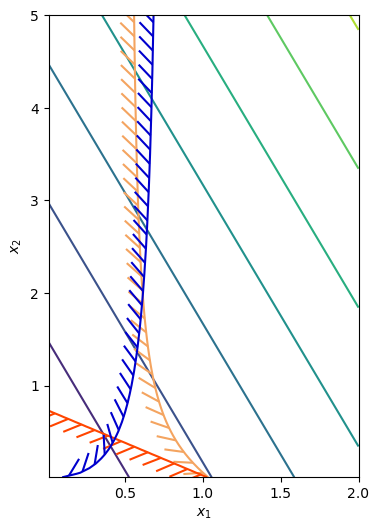

In [3]:
class problem1:
    def __init__(self, L, rho, E, P, sigma_low, sigma_high):
        self.L   = L
        self.rho = rho
        self.E   = E
        self.P   = P 
        self.sigma_low  = sigma_low
        self.sigma_high = sigma_high  
        return 
    
    def obj_func(self, x1, x2):
        return self.rho*self.L*(2*math.sqrt(2)*x1 + x2)
    
    def constraint_ineq1(self, x1, x2):
        numerator   = self.P*(math.sqrt(2)*x1 + x2)
        denominator = math.sqrt(2)*x1**2 + 2*x1*x2
        return self.sigma_high - numerator/denominator
    
    def constraint_ineq2(self, x1, x2):
        numerator   = self.P*math.sqrt(2)
        denominator = 2*x2 + math.sqrt(2)*x1
        return self.sigma_high - numerator/denominator
    
    def constraint_ineq3(self, x1, x2):
        numerator   = self.P * x2
        denominator = math.sqrt(2)*x1**2 + 2*x1*x2
        return -self.sigma_low - numerator/denominator
    

# Create the span of design variables
nx = 101
x1vals = np.linspace(0.01, 2, nx)
x2vals = np.linspace(0.01, 5.0, nx)
X1, X2 = np.meshgrid(x1vals, x2vals)

# create the problem instance
L = 1
rho = 1
E = 5
P = 1/8
sigma_low  = -1/12
sigma_high = 3/25
prob = problem1(L, rho, E, P, sigma_low, sigma_high)

# compute the objective and constraint
obj = prob.obj_func(X1, X2)
c1  = prob.constraint_ineq1(X1, X2)
c2  = prob.constraint_ineq2(X1, X2)
c3  = prob.constraint_ineq3(X1, X2)

# Create the figure to plot the design space
fig, ax = plt.subplots(figsize=(4, 6))

cntr = ax.contour(X1, X2, obj)

cg1 = ax.contour(X1, X2, -c1, [0.0], colors='sandybrown')
plt.setp(cg1.collections, path_effects=[patheffects.withTickedStroke()])

cg2 = ax.contour(X1, X2, -c2, [0.0], colors='orangered')
plt.setp(cg2.collections, path_effects=[patheffects.withTickedStroke()])

cg3 = ax.contour(X1, X2, -c3, [0.0], colors='mediumblue')
plt.setp(cg3.collections, path_effects=[patheffects.withTickedStroke()])

ax.set_xlim(0.01, 2)
ax.set_ylim(0.01, 5.0)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

plt.show()
        

### Part (b)
we can hand-derive the gradient of the objective function and the constraint. For the objective function, $\nabla f = [\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}]^T = [2\sqrt{2}\rho L, \rho L ]$

Similarly, we can hand derive the three constraints' gradient via $\nabla c_i$ where $c_i$ is the constraint i. I derive with the quotient rule.

The first constraint gradient gives $[-\frac{2P(x_1^2+\sqrt{2}x_1 x_2 + x_2^2)}{x_1^2(\sqrt{2}x_1+2x_2)^2}, -\frac{\sqrt{2}P}{(\sqrt{2}x + 2y)^2}]$

The second constraint gradient gives $[-\frac{2P}{(\sqrt{2}x_1+2x_2)^2}, -\frac{2\sqrt{2}P}{(\sqrt{2}x_1 + 2 x_2)^2}]$

The third constraint gradient gives $[-\frac{2P x_2(\sqrt{2}x_1+x_y)}{x_1^2(\sqrt{2}x_1+2x_2)^2}, \frac{\sqrt{2}P}{(\sqrt{2}x_1+2x_2)^2}]$


#### Part (c)
"Implement the objective, constraints and objective and constraint gradients"

You can find the implmentation of the hand-derived constraint gradient and objective gradient in the following class. You can also find the finite-difference implementation as a function/method in the class (both the real and complex versions).

I evaluate the gradient accuracy of the objective function, and all three constraints, at an arbitrary [x1, x2] point, here [0.7, 1]. Since analytical gradients are hand-derived, I evaluate the relative error with respect to the analytical error (as opposed to using the complex step that the lecture did).


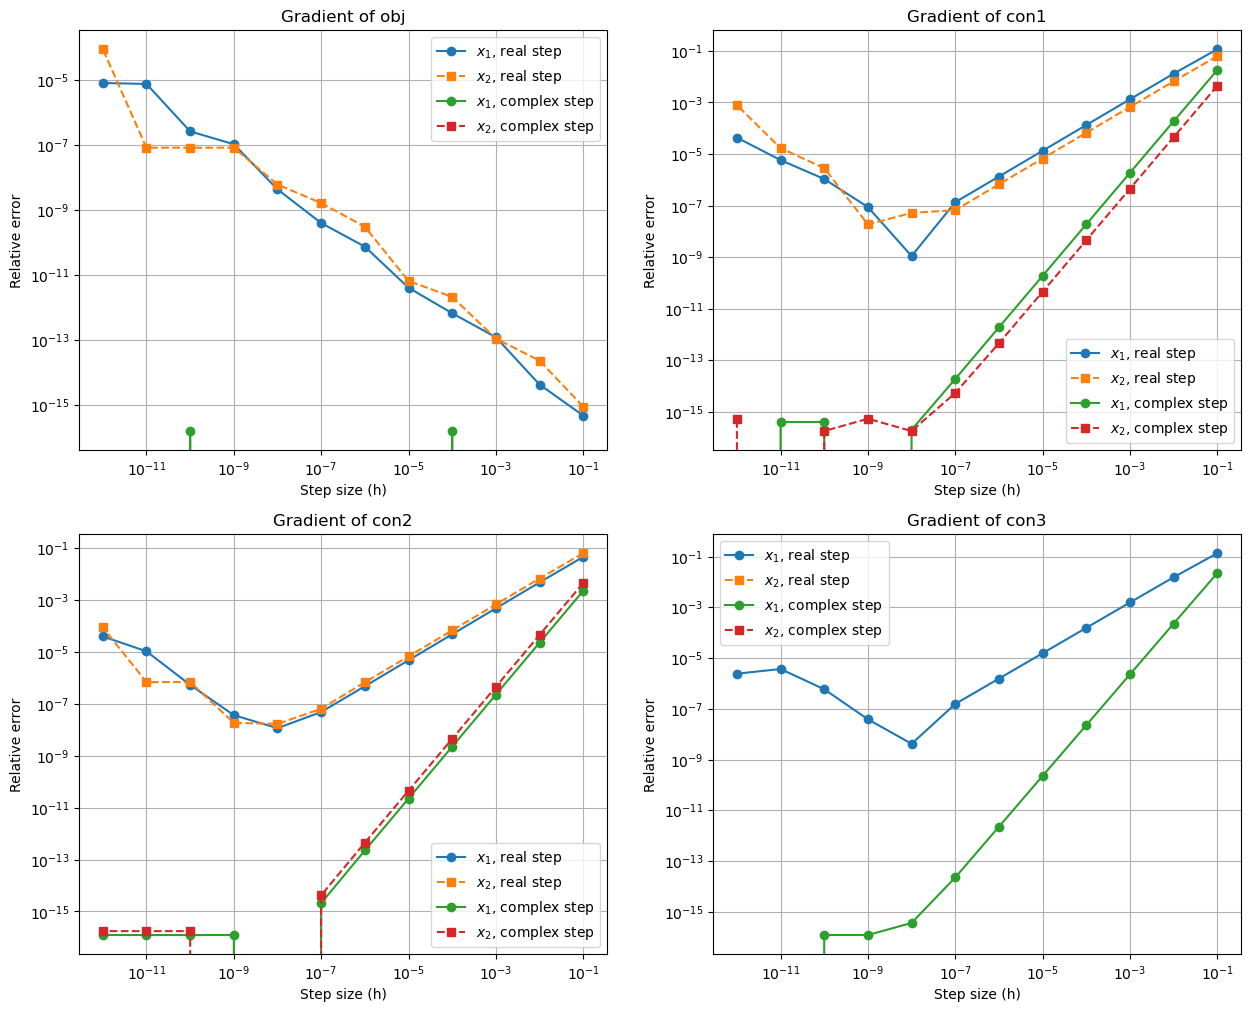

In [118]:
class problem1:
    def __init__(self, L, rho, E, P, sigma_low, sigma_high):
        self.L   = L
        self.rho = rho
        self.E   = E
        self.P   = P 
        self.sigma_low  = sigma_low
        self.sigma_high = sigma_high  
        return 
    
    def obj_func(self, x1, x2):
        return self.rho*self.L*(2*math.sqrt(2)*x1 + x2)
    
    def constraint_ineq1(self, x1, x2):
        numerator   = self.P*(math.sqrt(2)*x1 + x2)
        denominator = math.sqrt(2)*x1**2 + 2*x1*x2
        return self.sigma_high - numerator/denominator 
    
    def constraint_ineq2(self, x1, x2):
        numerator   = self.P*math.sqrt(2)
        denominator = 2*x2 + math.sqrt(2)*x1
        return self.sigma_high - numerator/denominator
    
    def constraint_ineq3(self, x1, x2):
        numerator   = self.P * x2
        denominator = math.sqrt(2)*x1**2 + 2*x1*x2
        return -self.sigma_low - numerator/denominator
    
    # ------ gradient functions ------
    
    def grad_obj(self, x1, x2):
        dfdx1 = self.rho*self.L*2*math.sqrt(2)
        dfdx2 = self.rho*self.L
        return np.array([dfdx1, dfdx2])
    
    def grad_con1(self, x1, x2):
        numerator   = self.P*(math.sqrt(2)*x1 + x2)
        denominator = math.sqrt(2)*x1**2 + 2*x1*x2
        dnum_dx1 = self.P*math.sqrt(2)
        dnum_dx2 = self.P
        dden_dx1 = 2*math.sqrt(2)*x1 + 2*x2
        dden_dx2 = 2*x1
        dcdx1 = -(dnum_dx1*denominator - numerator*dden_dx1)/denominator**2
        dcdx2 = -(dnum_dx2*denominator - numerator*dden_dx2)/denominator**2
        return np.array([dcdx1, dcdx2])
    
    def grad_con2(self, x1, x2):
        numerator   = self.P*math.sqrt(2)
        denominator = 2*x2 + math.sqrt(2)*x1
        dnum_dx1 = 0
        dnum_dx2 = 0
        dden_dx1 = math.sqrt(2)
        dden_dx2 = 2
        dcdx1 = -(dnum_dx1*denominator - numerator*dden_dx1)/denominator**2
        dcdx2 = -(dnum_dx2*denominator - numerator*dden_dx2)/denominator**2
        return np.array([dcdx1, dcdx2])
    
    def grad_con3(self, x1, x2):
        numerator   = self.P * x2
        denominator = math.sqrt(2)*x1**2 + 2*x1*x2
        dnum_dx1 = 0
        dnum_dx2 = self.P
        dden_dx1 = 2*math.sqrt(2)*x1 + 2*x2
        dden_dx2 = 2*x1
        dcdx1 = -(dnum_dx1*denominator - numerator*dden_dx1)/denominator**2
        dcdx2 = -(dnum_dx2*denominator - numerator*dden_dx2)/denominator**2
        return np.array([dcdx1, dcdx2])
    
    def finite_difference_real_grad(self, x1, x2, func, h=1e-8):
        f0 = func(x1, x2)
        dfdx1 = (func(x1 + h, x2) - f0)/h
        dfdx2 = (func(x1, x2 + h) - f0)/h
        return np.array([dfdx1, dfdx2])
    
    def finite_difference_complex_grad(self, x1, x2, func, h=1e-20):
        dfdx1 = np.imag(func(x1 + 1j*h, x2))/h
        dfdx2 = np.imag(func(x1, x2 + 1j*h))/h
        return np.array([dfdx1, dfdx2])
    

# create the problem instance
L = 1
rho = 1
E = 5
P = 1/8
sigma_low  = -1/12
sigma_high = 3/25
prob = problem1(L, rho, E, P, sigma_low, sigma_high)

# choose a point to evaluate the gradients
x1 = 0.7
x2 = 1
# evaluate the gradients with various step sizes
hvals = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]
obj_grads_analytic = prob.grad_obj(x1, x2)
con1_grads_analytic = prob.grad_con1(x1, x2)
con2_grads_analytic = prob.grad_con2(x1, x2)
con3_grads_analytic = prob.grad_con3(x1, x2)

# finite difference, real step
obj_grads_fd_real = np.zeros((len(hvals), 2))
con1_grads_fd_real = np.zeros((len(hvals), 2))
con2_grads_fd_real = np.zeros((len(hvals), 2))
con3_grads_fd_real = np.zeros((len(hvals), 2))
for i, h in enumerate(hvals):
    obj_grads_fd_real[i, :] = prob.finite_difference_real_grad(x1, x2, prob.obj_func, h)
    con1_grads_fd_real[i, :] = prob.finite_difference_real_grad(x1, x2, prob.constraint_ineq1, h)
    con2_grads_fd_real[i, :] = prob.finite_difference_real_grad(x1, x2, prob.constraint_ineq2, h)
    con3_grads_fd_real[i, :] = prob.finite_difference_real_grad(x1, x2, prob.constraint_ineq3, h)
# finite difference, complex step
obj_grads_fd_complex = np.zeros((len(hvals), 2))
con1_grads_fd_complex = np.zeros((len(hvals), 2))
con2_grads_fd_complex = np.zeros((len(hvals), 2))
con3_grads_fd_complex = np.zeros((len(hvals), 2))
for i, h in enumerate(hvals):
    obj_grads_fd_complex[i, :] = prob.finite_difference_complex_grad(x1, x2, prob.obj_func, h)
    con1_grads_fd_complex[i, :] = prob.finite_difference_complex_grad(x1, x2, prob.constraint_ineq1, h)
    con2_grads_fd_complex[i, :] = prob.finite_difference_complex_grad(x1, x2, prob.constraint_ineq2, h)
    con3_grads_fd_complex[i, :] = prob.finite_difference_complex_grad(x1, x2, prob.constraint_ineq3, h)

# plot the results
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
labels = ['obj', 'con1', 'con2', 'con3']
analytic_grads = [obj_grads_analytic, con1_grads_analytic, con2_grads_analytic, con3_grads_analytic]
fd_real_grads = [obj_grads_fd_real, con1_grads_fd_real, con2_grads_fd_real, con3_grads_fd_real]
fd_complex_grads = [obj_grads_fd_complex, con1_grads_fd_complex, con2_grads_fd_complex, con3_grads_fd_complex]
for i in range(4):
    axs[i].loglog(hvals, np.abs(fd_real_grads[i][:, 0] - analytic_grads[i][0])/analytic_grads[i][0], 'o-', label='$x_1$, real step')
    axs[i].loglog(hvals, np.abs(fd_real_grads[i][:, 1] - analytic_grads[i][1])/analytic_grads[i][1], 's--', label='$x_2$, real step')
    axs[i].loglog(hvals, np.abs(fd_complex_grads[i][:, 0] - analytic_grads[i][0])/analytic_grads[i][0], 'o-', label='$x_1$, complex step')
    axs[i].loglog(hvals, np.abs(fd_complex_grads[i][:, 1] - analytic_grads[i][1])/analytic_grads[i][1], 's--', label='$x_2$, complex step')
    axs[i].set_title(f'Gradient of {labels[i]}')
    axs[i].set_xlabel('Step size (h)')
    axs[i].set_ylabel('Relative error')
    axs[i].legend()
    axs[i].grid(True)




The plot above shows that regardless of the constraint or objective function, the complex step method shows exceptional accuracy across and better accuracy than the real-step method across all step sizes. 

We can see that for the constraint gradients, for step size less than 1e-8, the substractive cancellation dominates, meaning the smaller the step size, the larger the error. This is due to the loss of precision due to float point arithmetics. For step size larger than 1e-8, we see that the trunction error dominates, where the larger step size leads to larger relative error. The gradient of the objective function, however, is an exception, where the substractive error dominates through the range of step size we examined.

### Part (d): use scipy.optimize
"Use scipy.optimize to optimize the problem to find the optimized truss. Make sure to try both with finite-difference and with supplying user-provide gradients. Report the optimizer options you used and the average number of iterations from different starting points from across the design space."

The block of the code below evaluates the optimization with [0,5] bounds for both variables, using 'SLSQP' method and finite difference. It takes 45 iterations, and find the optimal [x1, x2] to be [8.215e-01  4.253e-01].

In [5]:
# use finite difference based gradient in scipy minimize
# to find the optimal truss
def obj_func_vec(x):
   return prob.obj_func(x[0], x[1])

def constraint_ineq1_vec(x):
   return prob.constraint_ineq1(x[0], x[1])

def constraint_ineq2_vec(x):
   return prob.constraint_ineq2(x[0], x[1])

def constraint_ineq3_vec(x):
   return prob.constraint_ineq3(x[0], x[1])

def grad_obj_vec(x):
   return prob.finite_difference_complex_grad(x[0], x[1], prob.obj_func)

def grad_con1_vec(x):
   return prob.finite_difference_complex_grad(x[0], x[1], prob.constraint_ineq1)

def grad_con2_vec(x):
   return prob.finite_difference_complex_grad(x[0], x[1], prob.constraint_ineq2)

def grad_con3_vec(x):
   return prob.finite_difference_complex_grad(x[0], x[1], prob.constraint_ineq3)

x0_init = np.array([1.5, 1.5])

minimize(obj_func_vec, x0_init,
       method='slsqp', jac=None, bounds=[(0, 5), (0, 5)], constraints=[
         {'type': 'ineq', 'fun': constraint_ineq1_vec},
         {'type': 'ineq', 'fun': constraint_ineq2_vec},
         {'type': 'ineq', 'fun': constraint_ineq3_vec}
       ])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.7489149977178324
       x: [ 8.215e-01  4.253e-01]
     nit: 45
     jac: [ 2.828e+00  1.000e+00]
    nfev: 141
    njev: 44

The code below is similar to the previous optimization, except that we are using the hand-derived gradient. It uses 19 iterations and found that the optimal [x1, x2] are [8.215e-01  4.253e-01], the same as the finite-difference based method. 

In [6]:
# use the supplied gradient in scipy minimize
# to find the optimal truss
minimize(obj_func_vec, x0_init,
         method='slsqp', jac=grad_obj_vec, bounds=[(0, 5), (0, 5)], constraints=[
           {'type': 'ineq', 'fun': constraint_ineq1_vec, 'jac': grad_con1_vec},
           {'type': 'ineq', 'fun': constraint_ineq2_vec, 'jac': grad_con2_vec},
           {'type': 'ineq', 'fun': constraint_ineq3_vec, 'jac': grad_con3_vec}
         ])

/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/3639827122.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return self.sigma_high - numerator/denominator
/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/3639827122.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  return -self.sigma_low - numerator/denominator


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.748915034868245
       x: [ 8.215e-01  4.253e-01]
     nit: 19
     jac: [ 2.828e+00  1.000e+00]
    nfev: 22
    njev: 19

The code below looks at the average of the iteration numbers (averaging between the finite difference and hand-derived graident), starting at a grid of initial points. 

In [ ]:
# generate a grid of initial points within the bounds
def generate_initial_points(x1_bounds, x2_bounds, num_points_per_dim):
    x1_vals = np.linspace(x1_bounds[0], x1_bounds[1], num_points_per_dim)
    x2_vals = np.linspace(x2_bounds[0], x2_bounds[1], num_points_per_dim)
    initial_points = []
    for x1 in x1_vals:
        for x2 in x2_vals:
            initial_points.append([x1, x2])
    return initial_points

# create the grid
initial_points = generate_initial_points((0.01, 5), (0.01, 5), 10)

methods = ['SLSQP']
fd_iterations = np.zeros((len(initial_points), len(methods)))
supplied_iterations = np.zeros((len(initial_points), len(methods)))

for idx, x0 in enumerate(initial_points):
    for m_idx, method in enumerate(methods):
        # FD-based gradient
        res_fd = minimize(obj_func_vec, x0,
                          method=method.lower(), jac=None, constraints=[
                              {'type': 'ineq', 'fun': constraint_ineq1_vec},
                              {'type': 'ineq', 'fun': constraint_ineq2_vec},
                              {'type': 'ineq', 'fun': constraint_ineq3_vec}
                          ])
        fd_iterations[idx, m_idx] = getattr(res_fd, 'nit', np.nan)
        # Supplied gradient
        res_supplied = minimize(obj_func_vec, x0,
                                method=method.lower(), jac=grad_obj_vec, constraints=[
                                    {'type': 'ineq', 'fun': constraint_ineq1_vec, 'jac': grad_con1_vec},
                                    {'type': 'ineq', 'fun': constraint_ineq2_vec, 'jac': grad_con2_vec},
                                    {'type': 'ineq', 'fun': constraint_ineq3_vec, 'jac': grad_con3_vec}
                                ])
        supplied_iterations[idx, m_idx] = getattr(res_supplied, 'nit', np.nan)



/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/3639827122.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return self.sigma_high - numerator/denominator
/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/3639827122.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  return -self.sigma_low - numerator/denominator
/var/folders/4t/z38656ln7w9g_cvlbbsg09n40000gn/T/ipykernel_50106/3639827122.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return self.sigma_high - numerator/denominator


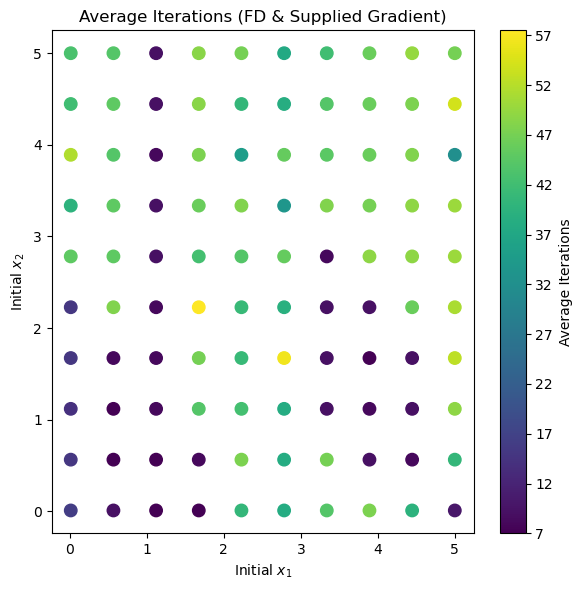

In [32]:
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 6))

avg_iters = (fd_iterations.flatten() + supplied_iterations.flatten()) / 2
sc = ax.scatter([p[0] for p in initial_points], [p[1] for p in initial_points],
                s=80, c=avg_iters, cmap='viridis')
ax.set_title('Average Iterations (FD & Supplied Gradient)')
ax.set_xlabel('Initial $x_1$')
ax.set_ylabel('Initial $x_2$')
cbar = plt.colorbar(sc, ax=ax, label='Average Iterations')
cbar.set_ticks(np.arange(int(min(avg_iters)), int(max(avg_iters))+1, 5))
plt.tight_layout()
plt.show()



#### Part e:
"Pick a minimizer. Evaluate the objective and constraint gradients at the minimizer and determine the multiplier values using the KKT conditions."

This means that $\nabla f(x*) = -A(x^*)^T\lambda^*$ where $\lambda^* \geq 0$, $c(x^*) \leq 0$, and $c_i(x^*) = 0$ (a logical OR statement which means that either the constraint is active $(c_i=0)$ or the multiplier is zero).

The code below proposes a few guesses. You can find the langrange multiplier of the active constraint(s) from each guess in the output as well as my assessment of the constraints (whether or not they violate KKT condition).

In [117]:
x_opt = np.array([8.215e-01,4.253e-01])  # from previous optimization results
obj_grad  = prob.grad_obj(x_opt[0], x_opt[1]).reshape(-1,1)
con1_grad = prob.grad_con1(x_opt[0], x_opt[1]).reshape(-1,1)
con2_grad = prob.grad_con2(x_opt[0], x_opt[1]).reshape(-1,1)
con3_grad = prob.grad_con3(x_opt[0], x_opt[1]).reshape(-1,1)


# our first guess: the active constraints are con1 and con2
A_active = np.hstack((con1_grad, con2_grad))
# solve for lambda
lambda_star = np.linalg.lstsq(A_active, obj_grad, rcond=None)[0]
print("------ Guess No.1 -------")
print("The active constraints are con1 and con2")
print("For guess no.1: Lagrange multipliers for active constraints:", lambda_star)
# print the constraint values
print("Constraint 1 is ", -prob.constraint_ineq1(x_opt[0], x_opt[1]))
print("Constraint 2 is ", -prob.constraint_ineq2(x_opt[0], x_opt[1]))
print("Constraint 3 is ", -prob.constraint_ineq3(x_opt[0], x_opt[1]))
print("The assumed active constraint 2 has a negative Lagrange multiplier, so it contradicts the KKT conditions. We discard this guess.")

# our second guess: the active constraints are con1 and con3
A_active = np.hstack((con1_grad, con3_grad))
# solve for lambda
lambda_star = np.linalg.lstsq(A_active, obj_grad, rcond=None)[0]
print("------ Guess No.2 -------")
print("The active constraints are con1 and con3")
print("For guess no.2: Lagrange multipliers for active constraints:", lambda_star)
# print the constraint values
print("Constraint 1 is ", -prob.constraint_ineq1(x_opt[0], x_opt[1]))
print("Constraint 2 is ", -prob.constraint_ineq2(x_opt[0], x_opt[1]))
print("Constraint 3 is ", -prob.constraint_ineq3(x_opt[0], x_opt[1]))
print("The assumed active constraint 3 has negative Lagrange multiplier, so it contradicts the KKT conditions. We discard this guess.")

# our third guess: the active constraints are con2 and con3
A_active = np.hstack((con2_grad, con3_grad))
# solve for lambda
lambda_star = np.linalg.lstsq(A_active, obj_grad, rcond=None)[0]
print("------ Guess No.3 -------")
print("the active constraints are con2 and con3")
print("For guess no.3: Lagrange multipliers for active constraints:", lambda_star)
# print the constraint values
print("Constraint 1 is ", -prob.constraint_ineq1(x_opt[0], x_opt[1]))
print("Constraint 2 is ", -prob.constraint_ineq2(x_opt[0], x_opt[1]))
print("Constraint 3 is ", -prob.constraint_ineq3(x_opt[0], x_opt[1]))
print("The assumed active constraints 2 and 3 have negative Lagrange multipliers, so they contradict the KKT conditions. We discard this guess.")

# assume our final guess: the active constraint is con1
# Only use the active constraint's gradient for KKT
A_active = con1_grad
# Solve for the single multiplier
lambda_star = np.linalg.lstsq(A_active, obj_grad, rcond=None)[0]
print("------ Guess No.4 -------")
print("The active constraint is con1")
print("Lagrange multiplier for active constraint:", lambda_star)
# print the constraint values
print("Constraint 1 is ", -prob.constraint_ineq1(x_opt[0], x_opt[1]))
print("Constraint 2 is ", -prob.constraint_ineq2(x_opt[0], x_opt[1]))
print("Constraint 3 is ", -prob.constraint_ineq3(x_opt[0], x_opt[1]))
print("the lambda for the active constraint 1 is positive...")
print("and the inactive constraints evaluated at the optimal points are negative")
print("Therefore, our guess is correct.")


------ Guess No.1 -------
The active constraints are con1 and con2
For guess no.1: Lagrange multipliers for active constraints: [[2.29055843e+01]
 [1.37303806e-03]]
Constraint 1 is  2.7133275000146284e-06
Constraint 2 is  -0.03215525502485393
Constraint 3 is  -0.0511753649809794
The assumed active constraint 2 has a negative Lagrange multiplier, so it contradicts the KKT conditions. We discard this guess.
------ Guess No.2 -------
The active constraints are con1 and con3
For guess no.2: Lagrange multipliers for active constraints: [[ 2.29069574e+01]
 [-1.37303806e-03]]
Constraint 1 is  2.7133275000146284e-06
Constraint 2 is  -0.03215525502485393
Constraint 3 is  -0.0511753649809794
The assumed active constraint 3 has negative Lagrange multiplier, so it contradicts the KKT conditions. We discard this guess.
------ Guess No.3 -------
the active constraints are con2 and con3
For guess no.3: Lagrange multipliers for active constraints: [[22.90695736]
 [22.90558432]]
Constraint 1 is  2.7133

# Problem 2: Optimizing two trusses and the importance of scaling on design problems

The code below first examines the scaling impact for the three-bar truss case. The outputs -- the number of iterations, and the optimized bar area for each bar 

In [ ]:
class Truss:
    def __init__(self, conn, x, bcs, f, E=10.0, rho=0.1, sigma_low=-1e8, sigma_high = 50e6):
        self.conn = np.array(conn, dtype=int)
        self.x = np.array(x)
        self.bcs = np.array(bcs, dtype=int)
        self.f = np.array(f)
        self.E = E
        self.rho = rho
        self.sigma_low  = sigma_low
        self.sigma_high = sigma_high

        # Extract the number of nodes and elements
        self.nnodes = self.x.shape[0]
        self.nelems = self.conn.shape[0]

        # Form the reduced set of degrees of freedom
        self.reduced = np.setdiff1d(np.arange(2*self.nnodes), self.bcs)

        # Set up the i-j indices for the matrix - these are the row
        # and column indices in the stiffness matrix
        var = np.array((2*self.conn[:,0],
                        2*self.conn[:,0]+1,
                        2*self.conn[:,1],
                        2*self.conn[:,1]+1)).T
        i = []
        j = []
        for index in range(self.nelems):
            for ii in var[index, :]:
                for jj in var[index, :]:
                    i.append(ii)
                    j.append(jj)

        # Convert the lists into numpy arrays
        self.i = np.array(i, dtype=int)
        self.j = np.array(j, dtype=int)

        return

    def assemble_stiffness_matrix(self, A):
        """
        Assemble the stiffness matrix
        """

        # Compute the x and y distances between nodes
        xd = self.x[self.conn[:,1],0] - self.x[self.conn[:,0],0]
        yd = self.x[self.conn[:,1],1] - self.x[self.conn[:,0],1]
        Le = np.sqrt(xd**2 + yd**2)
        C = xd/Le
        S = yd/Le

        # Compute the B matrix
        B = np.zeros((self.nelems, 4))
        B[:, 0] = -C/Le
        B[:, 1] = -S/Le
        B[:, 2] = C/Le
        B[:, 3] = S/Le

        scale = self.E*A*Le

        # Compute all of the element matrices
        Ke = np.zeros((self.nelems, 4, 4))
        for i in range(self.nelems):
            Ke[i,:] = scale[i]*np.outer(B[i,:], B[i,:])

        K = sparse.coo_matrix((Ke.flatten(), (self.i, self.j)))
        K = K.tocsr()

        return K

    def compute_stresses(self, u):
        """
        Compute the stresses in each element
        """

        # Compute the x and y distances between nodes
        xd = self.x[self.conn[:,1],0] - self.x[self.conn[:,0],0]
        yd = self.x[self.conn[:,1],1] - self.x[self.conn[:,0],1]
        Le = np.sqrt(xd**2 + yd**2)
        C = xd/Le
        S = yd/Le

        # Compute the B matrix
        B = np.zeros((self.nelems, 4))
        B[:, 0] = -C/Le
        B[:, 1] = -S/Le
        B[:, 2] = C/Le
        B[:, 3] = S/Le

        ue = np.array((u[2*self.conn[:,0]],
                       u[2*self.conn[:,0]+1],
                       u[2*self.conn[:,1]],
                       u[2*self.conn[:,1]+1])).T

        stress = self.E*np.sum(B*ue, axis=1)
        return stress

    def reduce_vector(self, forces):
        """
        Eliminate essential boundary conditions from the vector
        """
        return forces[self.reduced]

    def reduce_matrix(self, matrix):
        """
        Eliminate essential boundary conditions from the matrix
        """
        temp = matrix[self.reduced, :]
        return temp[:, self.reduced]

    def solve(self, A):
        """
        Perform a linear static analysis
        """

        K = self.assemble_stiffness_matrix(A)
        Kr = self.reduce_matrix(K)
        fr = self.reduce_vector(self.f)

        ur = sparse.linalg.spsolve(Kr, fr)

        u = np.zeros(2*self.nnodes)
        u[self.reduced] = ur

        return u
    
    def compute_mass(self, A):
        L = np.linalg.norm(self.x[self.conn[:,0]] - self.x[self.conn[:,1]], axis=1)
        mass = np.sum(L*self.rho*A)
        return mass

    def initialize_ref(self, A_low):
        """
        Compute reference values
        this includes reference area A_ref and reference mass mass_init
        """
        conn  = self.conn
        self.mass_init = self.rho * np.sum(A_low * np.linalg.norm(self.x[conn[:,1],:] - 
                                                                  self.x[conn[:,0],:]))
        self.A_ref = A_low
        return
    
    def obj_func_unscaled(self,A):
        """
        f = mass
        note that A (bar area) is a vector, independent for each bar
        """
        mass = np.zeros_like(A)
        for i in range(len(A)):
            mass[i] = A[i]*self.rho*np.linalg.norm(self.x[self.conn[i,1],:] - 
                                                   self.x[self.conn[i,0],:])
        return mass.sum()
    
    def obj_func_unscaled_Ascaled(self,Ahat):
        """
        f = mass
        note that A (bar area) is a vector, independent for each bar
        """
        mass = np.zeros_like(Ahat)
        for i in range(len(Ahat)):
            mass[i] = Ahat[i]*self.A_ref*self.rho*np.linalg.norm(self.x[self.conn[i,1],:] - 
                                                       self.x[self.conn[i,0],:])
        return mass.sum()

    def obj_func_scaled(self,A):
        """
        f = mass / mass_init
        minimize the mass of the truss
        note that A (bar area) is a vector, independent for each bar
        """
        # A is a vector, representing the area of each bar
        # iterate over each bar to compute the mass
        mass = np.zeros_like(A)
        for i in range(len(A)):
            mass[i] = A[i]*self.rho*np.linalg.norm(self.x[self.conn[i,1],:] - 
                                                   self.x[self.conn[i,0],:])
        return mass.sum()/self.mass_init

    def obj_func_scaled_Ascaled(self,Ahat):
        """
        f = mass / mass_init
        minimize the mass of the truss
        note that A (bar area) is a vector, independent for each bar
        """
        # A is a vector, representing the area of each bar
        # iterate over each bar to compute the mass
        mass = np.zeros_like(Ahat)
        for i in range(len(Ahat)):
            mass[i] = Ahat[i]*self.A_ref*self.rho*np.linalg.norm(self.x[self.conn[i,1],:] - 
                                                                 self.x[self.conn[i,0],:])
        return mass.sum()/self.mass_init
    
    def constraint_max_unscaled(self,A):
        """
        c = sigma_i - sigma_max <= 0
        implemented as 
        sigma_max - sigma_i >= 0
        """
        u = self.solve(A)
        stress = self.compute_stresses(u)
        return self.sigma_high - stress
    
    def constraint_max_unscaled_Ascaled(self,Ahat):
        u = self.solve(Ahat*self.A_ref)
        stress = self.compute_stresses(u)
        return self.sigma_high - stress
    
    def constraint_max_scaled(self,A):
        """ 
        use the scaled stress (wrt max stress) to define the constraint
        c = sigma_i/sigma_max - 1 <= 0
        implemented as
        1 - sigma_i/sigma_max >= 0
        """
        u = self.solve(A)
        stress = self.compute_stresses(u)
        return 1 - stress/self.sigma_high
    
    def constraint_max_scaled_Ascaled(self,Ahat):
        """ 
        use the scaled stress (wrt max stress) to define the constraint
        c = sigma_i/sigma_max - 1 <= 0
        implemented as
        1 - sigma_i/sigma_max >= 0
        """
        u = self.solve(Ahat*self.A_ref)
        stress = self.compute_stresses(u)
        return 1 - stress/self.sigma_high
    
    def constraint_min_unscaled(self,A):
        """ 
        c = sigma_min - stress <= 0
        implemented as
        stress - sigma_min >= 0
        """
        u = self.solve(A)
        stress = self.compute_stresses(u)
        return stress - self.sigma_low

    def constraint_min_unscaled_Ascaled(self,Ahat):
        u = self.solve(Ahat*self.A_ref)
        stress = self.compute_stresses(u)
        return stress - self.sigma_low

    def constraint_min_scaled(self,A):
        """ 
        use the scaled stress (wrt min stress) to define the constraint
        sigma_i >= sigma_min
        sigma_i/sigma_min >= 1
        sigma_i/sigma_min - 1 >= 0
        c = 1 - sigma_i/sigma_min <= 0
        implemented for scipy minimize as
        sigma_i/sigma_min - 1 >= 0
        """
        u = self.solve(A)
        stress = self.compute_stresses(u)
        return stress/self.sigma_low - 1
    
    def constraint_min_scaled_Ascaled(self,Ahat):
        """ 
        use the scaled stress (wrt min stress) to define the constraint
        sigma_i >= sigma_min
        sigma_i/sigma_min >= 1
        sigma_i/sigma_min - 1 >= 0
        c = 1 - sigma_i/sigma_min <= 0
        implemented for scipy minimize as
        sigma_i/sigma_min - 1 >= 0
        """
        u = self.solve(Ahat*self.A_ref)
        stress = self.compute_stresses(u)
        return stress/self.sigma_low - 1
    
    def plot(self, u=None, scale=1.0):
        """
        Visualize the truss and optionally its deformation.
        """
        fig = plt.figure(facecolor='w')

        if u is not None:
            x = self.x + scale*u.reshape((-1, 2))
        else:
            x = self.x

        for index in range(self.nelems):
            i = self.conn[index, 0]
            j = self.conn[index, 1]
            plt.plot([x[i,0], x[j,0]], [x[i,1], x[j,1]], '-ko')

        plt.show()

        return

L = 2 # meters
rho = 2500 # kg/m^3
E = 200e9 # pascal
P = 100e3 # newton
sigma_low  = -100e6 # pascal
sigma_high = 50e6 # pascal
A_low = 50e-6 # 50 mm^2

# three bar truss
conn = [[1,0], [2,1], [3,1]]
xpos = [[0, 0], [L, -L], [L, 0], [2*L, 0]]
bcs = [0, 1, 4, 5, 6, 7]
force = [0, 0, np.sin(np.pi/6)*P, -np.cos(np.pi/6)*P, 0, 0, 0, 0]

three_truss = Truss(conn, xpos, bcs, force, E, rho)
three_truss.initialize_ref(A_low)

# create a grid of initial starting points
A_init_high = 1 # 100 mm^2
A_init_grid = np.linspace(A_low, A_init_high, 10)
A_scaled_init_grid = np.linspace(A_low/three_truss.A_ref, A_init_high/three_truss.A_ref, 10)

# iterate over the grid and optimize from each starting point
# for each starting point
# store the number of iterations, the mass, whether constraints are violated
# for each of the four scaling strategies
# initialize the storage arrays
exp_a = dict()
exp_b = dict()
exp_c = dict()
exp_d = dict()

exp_a['nit'] = []
exp_a['mass'] = []
exp_a['constraint_max_violated'] = []
exp_a['constraint_min_violated'] = []

exp_b['nit'] = []
exp_b['mass'] = []
exp_b['constraint_max_violated'] = []
exp_b['constraint_min_violated'] = []

exp_c['nit'] = []
exp_c['mass'] = []
exp_c['constraint_max_violated'] = []
exp_c['constraint_min_violated'] = []

exp_d['nit'] = []
exp_d['mass'] = []
exp_d['constraint_max_violated'] = []
exp_d['constraint_min_violated'] = []

for idx, A_sample in enumerate(A_init_grid):
    A_sample_dimensional = A_init_grid[idx]
    A_sample_scaled      = A_scaled_init_grid[idx]

    # ------- experiment a -------
    # create an optimization object
    three_truss = Truss(conn, xpos, bcs, force, E, rho)
    three_truss.initialize_ref(A_low)

    # first, we optimize with unscaled constraint, objective, and variables
    # Ensure bounds match the length of the initial guess
    bounds = [(A_low, None) for _ in range(len(conn))]
    A_init = A_sample_dimensional*np.ones(len(conn))
    res1 = minimize(three_truss.obj_func_unscaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                    {'type': 'ineq', 'fun': three_truss.constraint_max_unscaled},
                    {'type': 'ineq', 'fun': three_truss.constraint_min_unscaled}
                    ])
    
    # save the results
    exp_a['nit'].append(res1.nit)
    exp_a['mass'].append(three_truss.obj_func_unscaled(res1.x))
    exp_a['constraint_max_violated'].append(np.any(three_truss.constraint_max_unscaled(res1.x) < 0))
    exp_a['constraint_min_violated'].append(np.any(three_truss.constraint_min_unscaled(res1.x) < 0))

    # ------- experiment b -------
    # optimize with constraint and objective scaled, but design variable unscaled
    three_truss = Truss(conn, xpos, bcs, force, E, rho)
    three_truss.initialize_ref(A_low)
    bounds = [(A_low, None) for _ in range(len(conn))]
    A_init = A_sample_dimensional*np.ones(len(conn))
    res2 = minimize(three_truss.obj_func_scaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                    {'type': 'ineq', 'fun': three_truss.constraint_max_scaled},
                    {'type': 'ineq', 'fun': three_truss.constraint_min_scaled}
                ])
    # save the results
    exp_b['nit'].append(res2.nit)
    exp_b['mass'].append(three_truss.obj_func_scaled(res2.x)*three_truss.mass_init)
    exp_b['constraint_max_violated'].append(np.any(three_truss.constraint_max_scaled(res2.x) < 0))
    exp_b['constraint_min_violated'].append(np.any(three_truss.constraint_min_scaled(res2.x) < 0))

    # ------- experiment c -------
    # optimize with no constraint or objective scaled, but design variable scaled
    three_truss = Truss(conn, xpos, bcs, force, E, rho)
    three_truss.initialize_ref(A_low)
    bounds = [(A_low/three_truss.A_ref, None) for i in range(len(conn))]
    A_init = A_sample_scaled*np.ones(len(conn))
    res3 = minimize(three_truss.obj_func_unscaled_Ascaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                    {'type': 'ineq', 'fun': three_truss.constraint_max_unscaled_Ascaled},
                    {'type': 'ineq', 'fun': three_truss.constraint_min_unscaled_Ascaled}
                ])
    # save the results
    exp_c['nit'].append(res3.nit)
    exp_c['mass'].append(three_truss.obj_func_unscaled_Ascaled(res3.x))
    exp_c['constraint_max_violated'].append(np.any(three_truss.constraint_max_unscaled_Ascaled(res3.x) < 0))
    exp_c['constraint_min_violated'].append(np.any(three_truss.constraint_min_unscaled_Ascaled(res3.x) < 0))

    # ------- experiment d -------
    # optimize with constraint, objective, and design variable all scaled
    three_truss = Truss(conn, xpos, bcs, force, E, rho)
    three_truss.initialize_ref(A_low)
    bounds = [(A_low/three_truss.A_ref, None) for i in range(len(conn))]
    A_init = A_sample_scaled*np.ones(len(conn))
    res4 = minimize(three_truss.obj_func_scaled_Ascaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                        {'type': 'ineq', 'fun': three_truss.constraint_max_scaled_Ascaled},
                        {'type': 'ineq', 'fun': three_truss.constraint_min_scaled_Ascaled}
                    ])
    # save the results
    exp_d['nit'].append(res4.nit)
    exp_d['mass'].append(three_truss.obj_func_scaled_Ascaled(res4.x)*three_truss.mass_init)
    exp_d['constraint_max_violated'].append(np.any(three_truss.constraint_max_scaled_Ascaled(res4.x) < 0))
    exp_d['constraint_min_violated'].append(np.any(three_truss.constraint_min_scaled_Ascaled(res4.x) < 0))

    # print progress
    print("Iteration ", idx+1, " of ", len(A_init_grid))
    print(f"Completed optimization for initial area {A_sample_dimensional:.2e} m^2")


Iteration  1  of  10
Completed optimization for initial area 5.00e-05 m^2
Iteration  2  of  10
Completed optimization for initial area 1.11e-01 m^2
Iteration  3  of  10
Completed optimization for initial area 2.22e-01 m^2
Iteration  4  of  10
Completed optimization for initial area 3.33e-01 m^2
Iteration  5  of  10
Completed optimization for initial area 4.44e-01 m^2
Iteration  6  of  10
Completed optimization for initial area 5.56e-01 m^2
Iteration  7  of  10
Completed optimization for initial area 6.67e-01 m^2
Iteration  8  of  10
Completed optimization for initial area 7.78e-01 m^2
Iteration  9  of  10
Completed optimization for initial area 8.89e-01 m^2
Iteration  10  of  10
Completed optimization for initial area 1.00e+00 m^2


The code below shows the iteration number for each experiment, as a function of the initial bar area. It appears that experiment (c), the one with only the design variable scaling, shows the easiest convergence (smallest amount of iterations required).

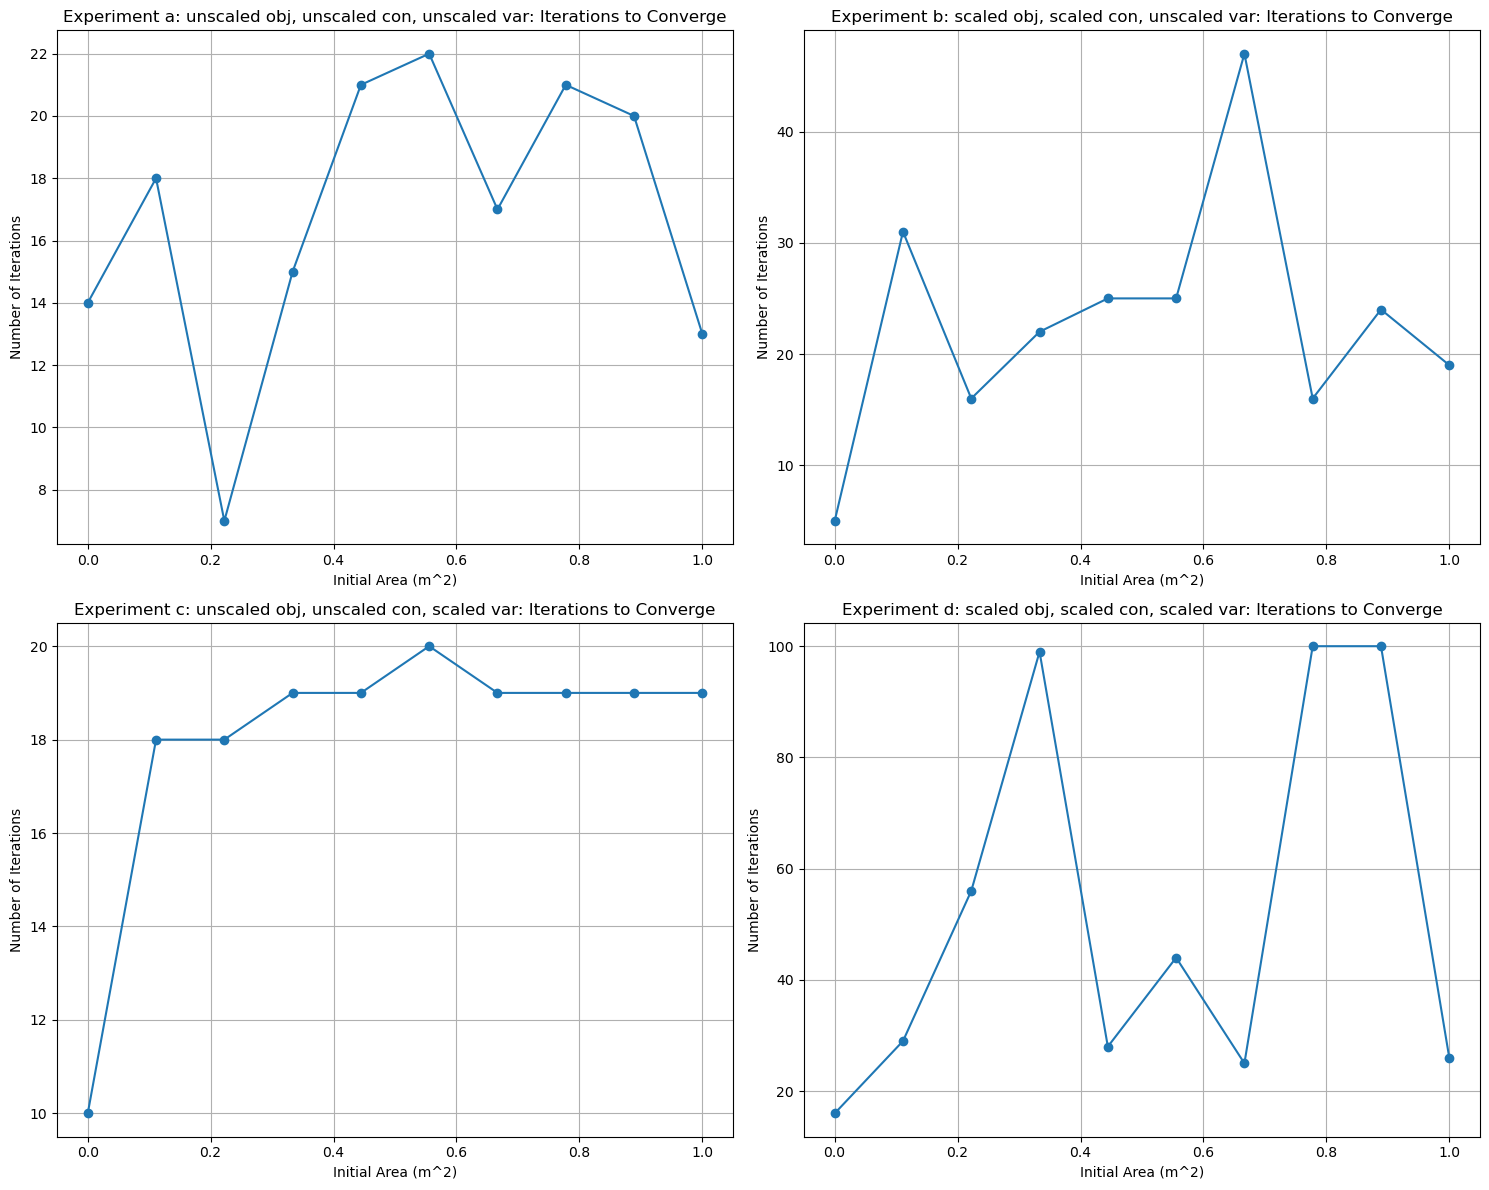

In [137]:
# plot the iteration counts, mass, and constraint violations
plt.close('all')
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
labels = ['a: unscaled obj, unscaled con, unscaled var',
          'b: scaled obj, scaled con, unscaled var',
          'c: unscaled obj, unscaled con, scaled var',
          'd: scaled obj, scaled con, scaled var']
experiments = [exp_a, exp_b, exp_c, exp_d]
for i in range(4):
    axs[i].plot(A_init_grid, experiments[i]['nit'], 'o-')
    axs[i].set_title(f'Experiment {labels[i]}: Iterations to Converge')
    axs[i].set_xlabel('Initial Area (m^2)')
    axs[i].set_ylabel('Number of Iterations')
    axs[i].grid(True)
plt.tight_layout()
plt.show()


The plot below shows the mass of optimal truss. Given the magnitude of mass, it seems that experiment (a) and (c) achieves reasonable results while the other two gives too high the estimates.

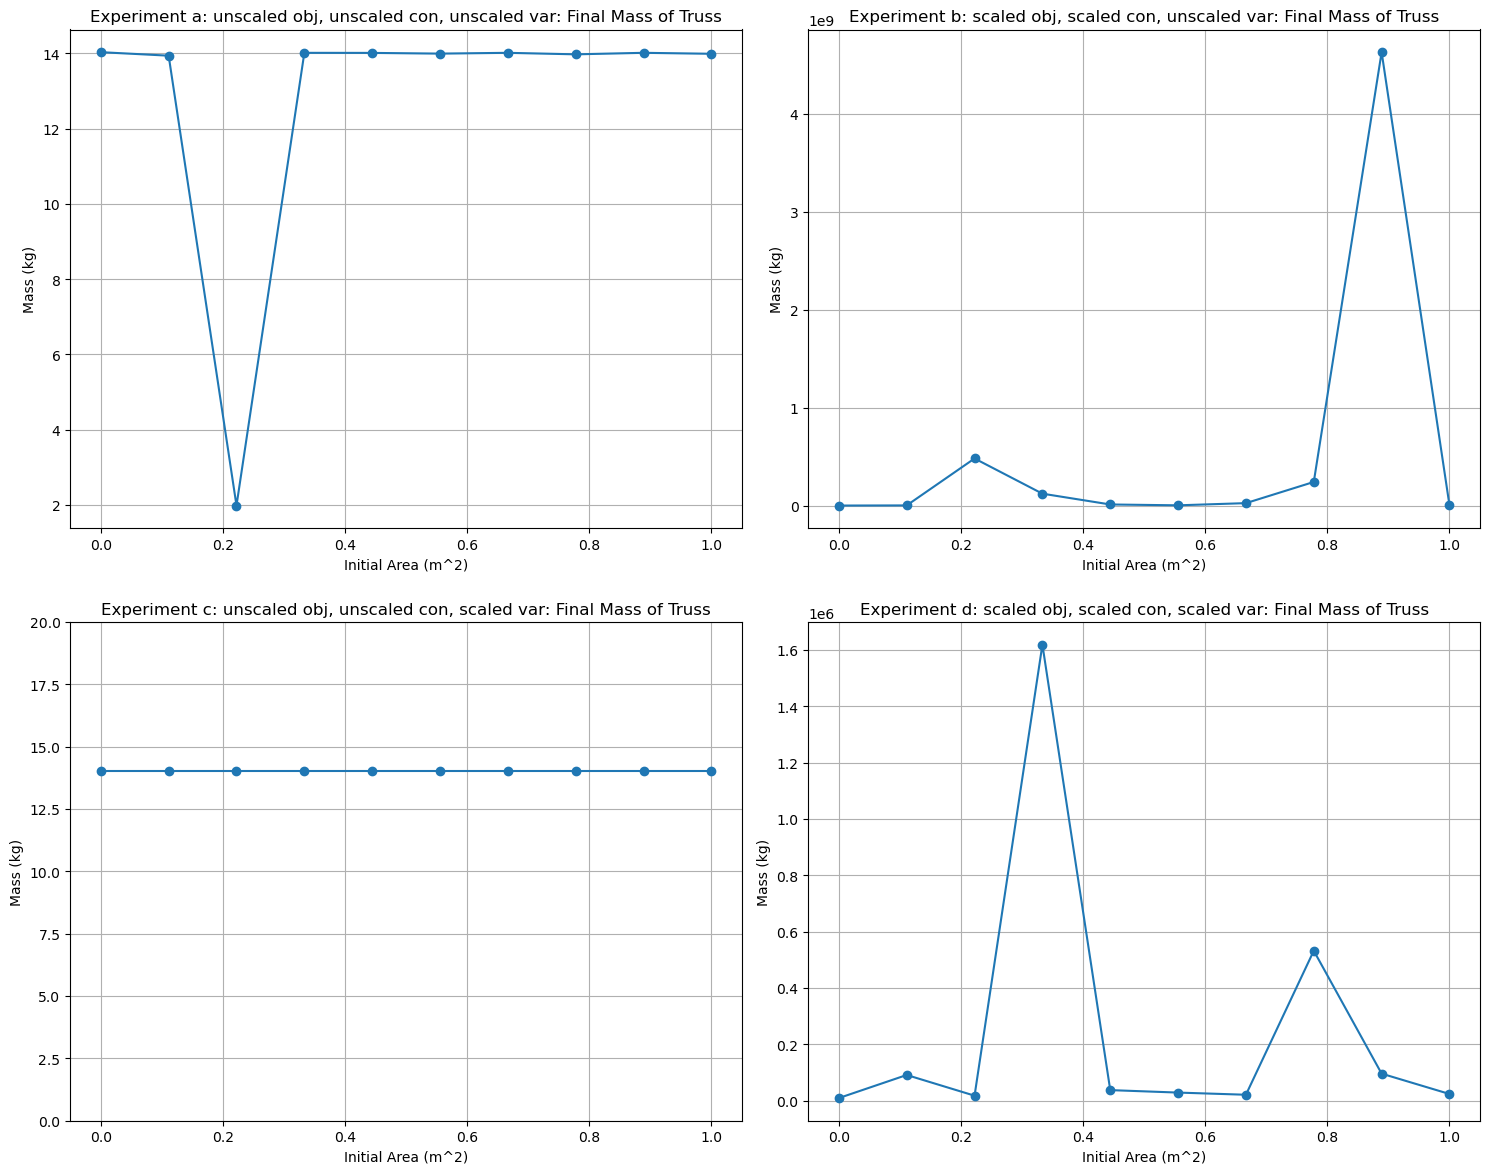

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
for i in range(4):
    axs[i].plot(A_init_grid, experiments[i]['mass'], 'o-')
    axs[i].set_title(f'Experiment {labels[i]}: Final Mass of Truss')
    axs[i].set_xlabel('Initial Area (m^2)')
    axs[i].set_ylabel('Mass (kg)')
    axs[i].grid(True)
    if i == 2:
        axs[i].set_ylim(0, 20)
plt.tight_layout()
plt.show()

The plot below shows the constraint violation. Only certain combinations in experiment (c) satistify both min and max constraints.

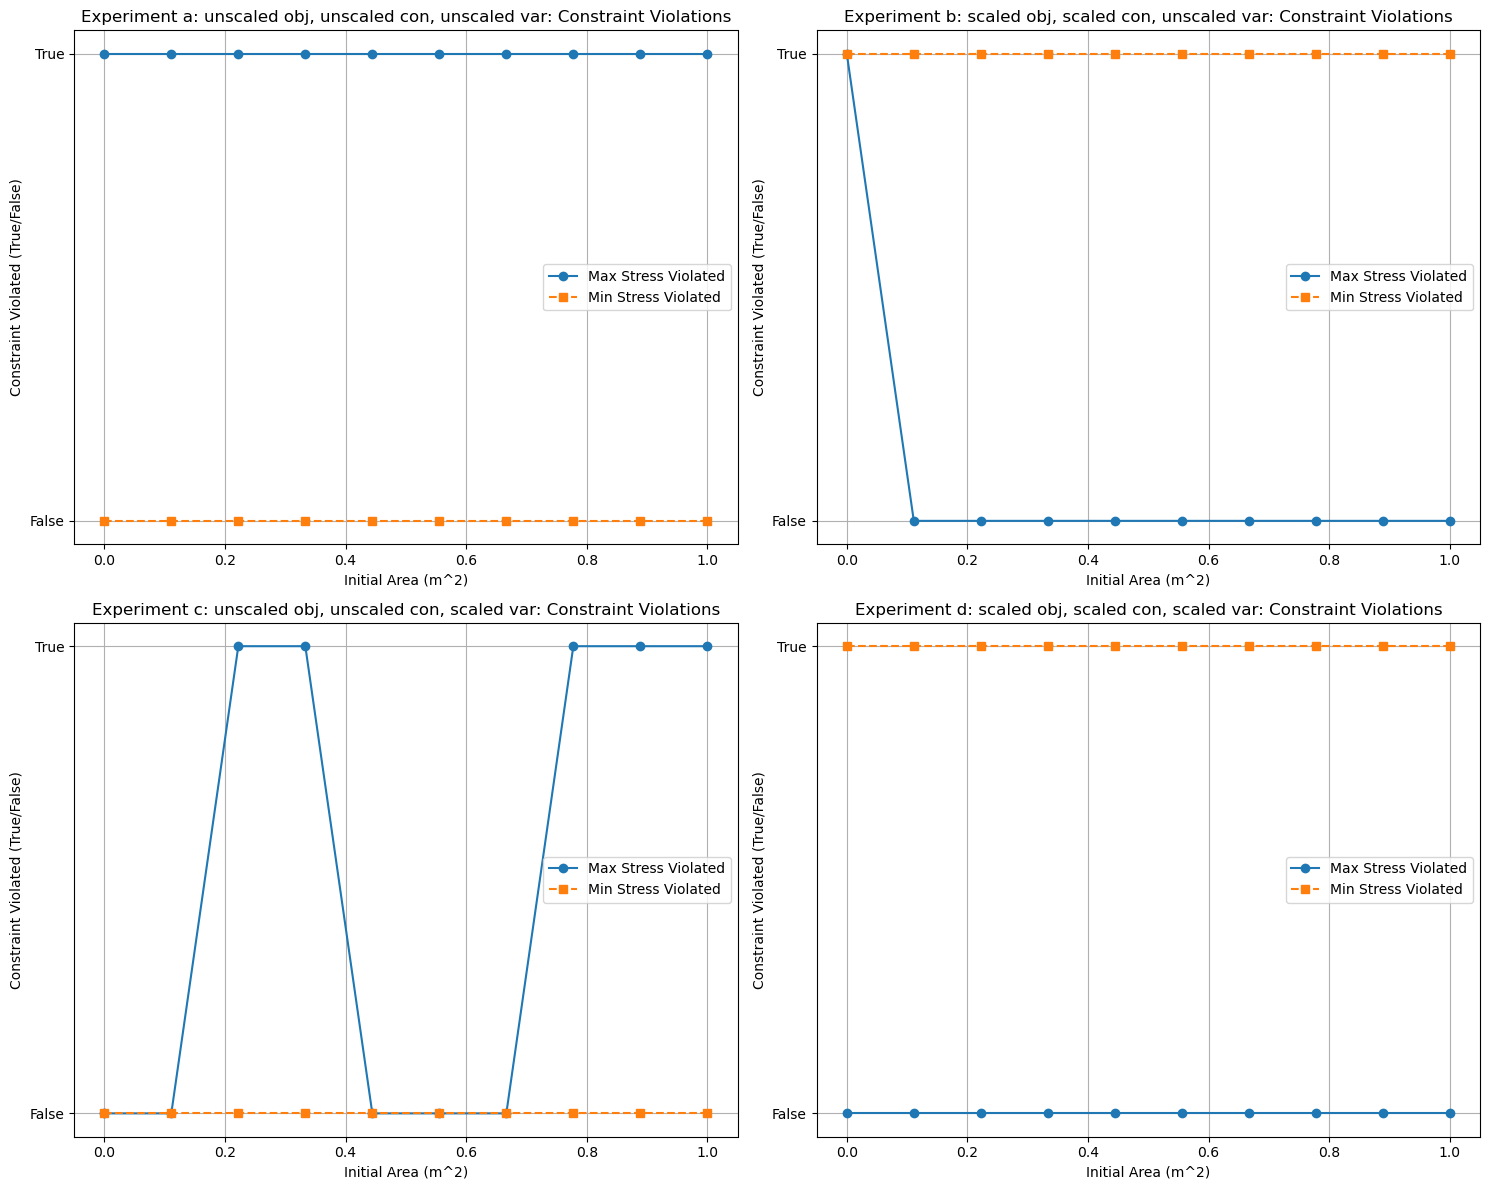

In [139]:
# plot the constraint violations
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
for i in range(4):
    axs[i].plot(A_init_grid, experiments[i]['constraint_max_violated'], 'o-', label='Max Stress Violated')
    axs[i].plot(A_init_grid, experiments[i]['constraint_min_violated'], 's--', label='Min Stress Violated')
    axs[i].set_title(f'Experiment {labels[i]}: Constraint Violations')
    axs[i].set_xlabel('Initial Area (m^2)')
    axs[i].set_ylabel('Constraint Violated (True/False)')
    axs[i].set_yticks([0, 1])
    axs[i].set_yticklabels(['False', 'True'])
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

### The 11-bar truss
The code below is similar to the one above, except we are exploring the optimal design of the 11-bar truss

In [140]:
# 11 bar truss 
xpos = [[0, 0], [L, L/2], [L, -L], [2*L, L/2], [2*L, -L], [3*L, 0]]
conn = [[0,1], [0,3], [0,2],[1,2],[1,3],[1,5],[1,4],[2,4],[2,3],[3,4],[3,5],[4,5]]
bcs = [0, 1, 10, 11]
force = [0, 0, 0, 0, 0, -P, 0, 0, 0, -2*P, 0, 0]

elev_truss = Truss(conn, xpos, bcs, force)
elev_truss.initialize_ref(A_low)

# create a grid of initial starting points
A_init_high = 1 # 100 mm^2
A_init_grid = np.linspace(A_low, A_init_high, 10)
A_scaled_init_grid = np.linspace(A_low/elev_truss.A_ref, A_init_high/elev_truss.A_ref, 10)

# iterate over the grid and optimize from each starting point
# for each starting point
# store the number of iterations, the mass, whether constraints are violated
# for each of the four scaling strategies
# initialize the storage arrays
exp_a = dict()
exp_b = dict()
exp_c = dict()
exp_d = dict()

exp_a['nit'] = []
exp_a['mass'] = []
exp_a['constraint_max_violated'] = []
exp_a['constraint_min_violated'] = []

exp_b['nit'] = []
exp_b['mass'] = []
exp_b['constraint_max_violated'] = []
exp_b['constraint_min_violated'] = []

exp_c['nit'] = []
exp_c['mass'] = []
exp_c['constraint_max_violated'] = []
exp_c['constraint_min_violated'] = []

exp_d['nit'] = []
exp_d['mass'] = []
exp_d['constraint_max_violated'] = []
exp_d['constraint_min_violated'] = []

for idx, A_sample in enumerate(A_init_grid):
    A_sample_dimensional = A_init_grid[idx]
    A_sample_scaled      = A_scaled_init_grid[idx]

    # ------- experiment a -------
    # create an optimization object
    elev_truss = Truss(conn, xpos, bcs, force, E, rho)
    elev_truss.initialize_ref(A_low)

    # first, we optimize with unscaled constraint, objective, and variables
    # Ensure bounds match the length of the initial guess
    bounds = [(A_low, None) for _ in range(len(conn))]
    A_init = A_sample_dimensional*np.ones(len(conn))
    res1 = minimize(elev_truss.obj_func_unscaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                    {'type': 'ineq', 'fun': elev_truss.constraint_max_unscaled},
                    {'type': 'ineq', 'fun': elev_truss.constraint_min_unscaled}
                    ])
    
    # save the results
    exp_a['nit'].append(res1.nit)
    exp_a['mass'].append(elev_truss.obj_func_unscaled(res1.x))
    exp_a['constraint_max_violated'].append(np.any(elev_truss.constraint_max_unscaled(res1.x) < 0))
    exp_a['constraint_min_violated'].append(np.any(elev_truss.constraint_min_unscaled(res1.x) < 0))

    # ------- experiment b -------
    # optimize with constraint and objective scaled, but design variable unscaled
    elev_truss = Truss(conn, xpos, bcs, force, E, rho)
    elev_truss.initialize_ref(A_low)
    bounds = [(A_low, None) for _ in range(len(conn))]
    A_init = A_sample_dimensional*np.ones(len(conn))
    res2 = minimize(elev_truss.obj_func_scaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                    {'type': 'ineq', 'fun': elev_truss.constraint_max_scaled},
                    {'type': 'ineq', 'fun': elev_truss.constraint_min_scaled}
                ])
    # save the results
    exp_b['nit'].append(res2.nit)
    exp_b['mass'].append(elev_truss.obj_func_scaled(res2.x)*elev_truss.mass_init)
    exp_b['constraint_max_violated'].append(np.any(elev_truss.constraint_max_scaled(res2.x) < 0))
    exp_b['constraint_min_violated'].append(np.any(elev_truss.constraint_min_scaled(res2.x) < 0))

    # ------- experiment c -------
    # optimize with no constraint or objective scaled, but design variable scaled
    elev_truss = Truss(conn, xpos, bcs, force, E, rho)
    elev_truss.initialize_ref(A_low)
    bounds = [(A_low/elev_truss.A_ref, None) for i in range(len(conn))]
    A_init = A_sample_scaled*np.ones(len(conn))
    res3 = minimize(elev_truss.obj_func_unscaled_Ascaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                    {'type': 'ineq', 'fun': elev_truss.constraint_max_unscaled_Ascaled},
                    {'type': 'ineq', 'fun': elev_truss.constraint_min_unscaled_Ascaled}
                ])
    # save the results
    exp_c['nit'].append(res3.nit)
    exp_c['mass'].append(elev_truss.obj_func_unscaled_Ascaled(res3.x))
    exp_c['constraint_max_violated'].append(np.any(elev_truss.constraint_max_unscaled_Ascaled(res3.x) < 0))
    exp_c['constraint_min_violated'].append(np.any(elev_truss.constraint_min_unscaled_Ascaled(res3.x) < 0))

    # ------- experiment d -------
    # optimize with constraint, objective, and design variable all scaled
    elev_truss = Truss(conn, xpos, bcs, force, E, rho)
    elev_truss.initialize_ref(A_low)
    bounds = [(A_low/elev_truss.A_ref, None) for i in range(len(conn))]
    A_init = A_sample_scaled*np.ones(len(conn))
    res4 = minimize(elev_truss.obj_func_scaled_Ascaled, A_init,
                    method='SLSQP', jac=None, bounds=bounds, constraints=[
                        {'type': 'ineq', 'fun': elev_truss.constraint_max_scaled_Ascaled},
                        {'type': 'ineq', 'fun': elev_truss.constraint_min_scaled_Ascaled}
                    ])
    # save the results
    exp_d['nit'].append(res4.nit)
    exp_d['mass'].append(elev_truss.obj_func_scaled_Ascaled(res4.x)*elev_truss.mass_init)
    exp_d['constraint_max_violated'].append(np.any(elev_truss.constraint_max_scaled_Ascaled(res4.x) < 0))
    exp_d['constraint_min_violated'].append(np.any(elev_truss.constraint_min_scaled_Ascaled(res4.x) < 0))

    # print progress
    print("Iteration ", idx+1, " of ", len(A_init_grid))
    print(f"Completed optimization for initial area {A_sample_dimensional:.2e} m^2")



Iteration  1  of  10
Completed optimization for initial area 5.00e-05 m^2


/Users/donglaiyang/anaconda3/envs/NativePython/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/donglaiyang/anaconda3/envs/NativePython/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/Users/donglaiyang/anaconda3/envs/NativePython/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:501: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])


Iteration  2  of  10
Completed optimization for initial area 1.11e-01 m^2
Iteration  3  of  10
Completed optimization for initial area 2.22e-01 m^2
Iteration  4  of  10
Completed optimization for initial area 3.33e-01 m^2
Iteration  5  of  10
Completed optimization for initial area 4.44e-01 m^2
Iteration  6  of  10
Completed optimization for initial area 5.56e-01 m^2
Iteration  7  of  10
Completed optimization for initial area 6.67e-01 m^2
Iteration  8  of  10
Completed optimization for initial area 7.78e-01 m^2
Iteration  9  of  10
Completed optimization for initial area 8.89e-01 m^2
Iteration  10  of  10
Completed optimization for initial area 1.00e+00 m^2


The plot below shows the number of iterations across all four experiments. It seems like experiment (a) and (b) consistently do a better job than (c) and (d). 

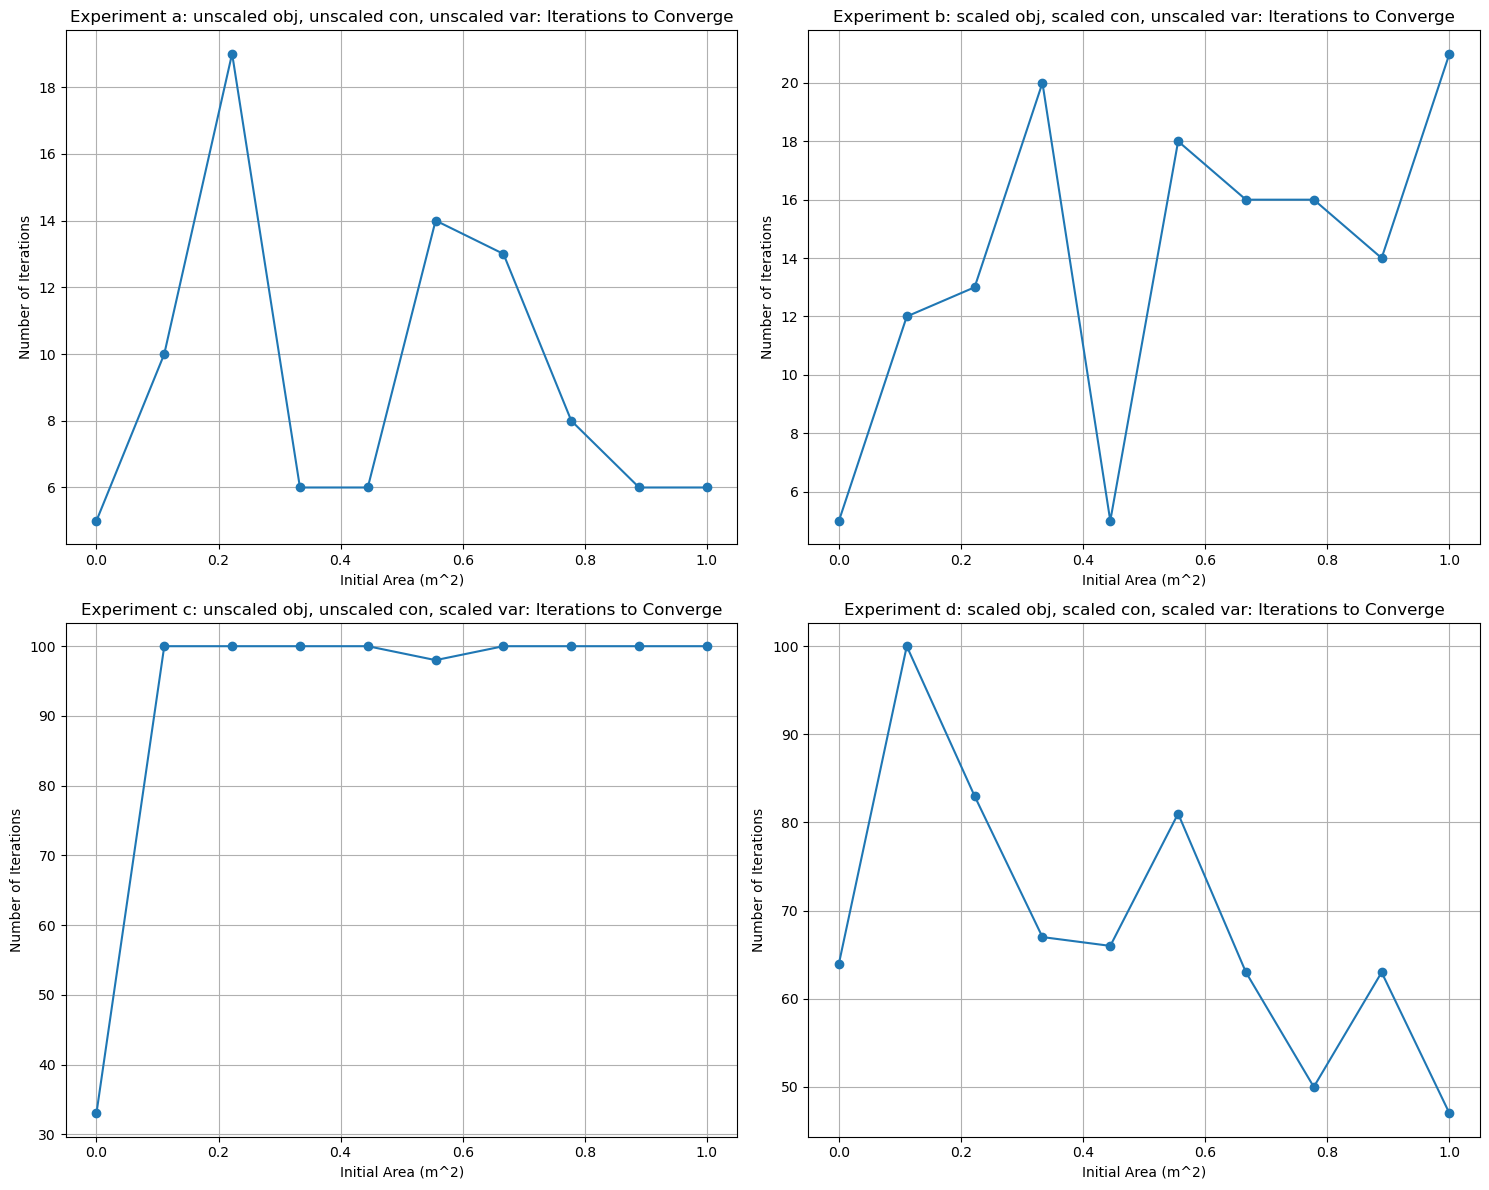

In [141]:
# plot the iteration counts, mass, and constraint violations
plt.close('all')
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
labels = ['a: unscaled obj, unscaled con, unscaled var',
          'b: scaled obj, scaled con, unscaled var',
          'c: unscaled obj, unscaled con, scaled var',
          'd: scaled obj, scaled con, scaled var']
experiments = [exp_a, exp_b, exp_c, exp_d]
for i in range(4):
    axs[i].plot(A_init_grid, experiments[i]['nit'], 'o-')
    axs[i].set_title(f'Experiment {labels[i]}: Iterations to Converge')
    axs[i].set_xlabel('Initial Area (m^2)')
    axs[i].set_ylabel('Number of Iterations')
    axs[i].grid(True)
plt.tight_layout()
plt.show()

The plot below shows the optimal mass across the experiments. It seems that only experiment (a) and (c) produce reasonable mass estimates.

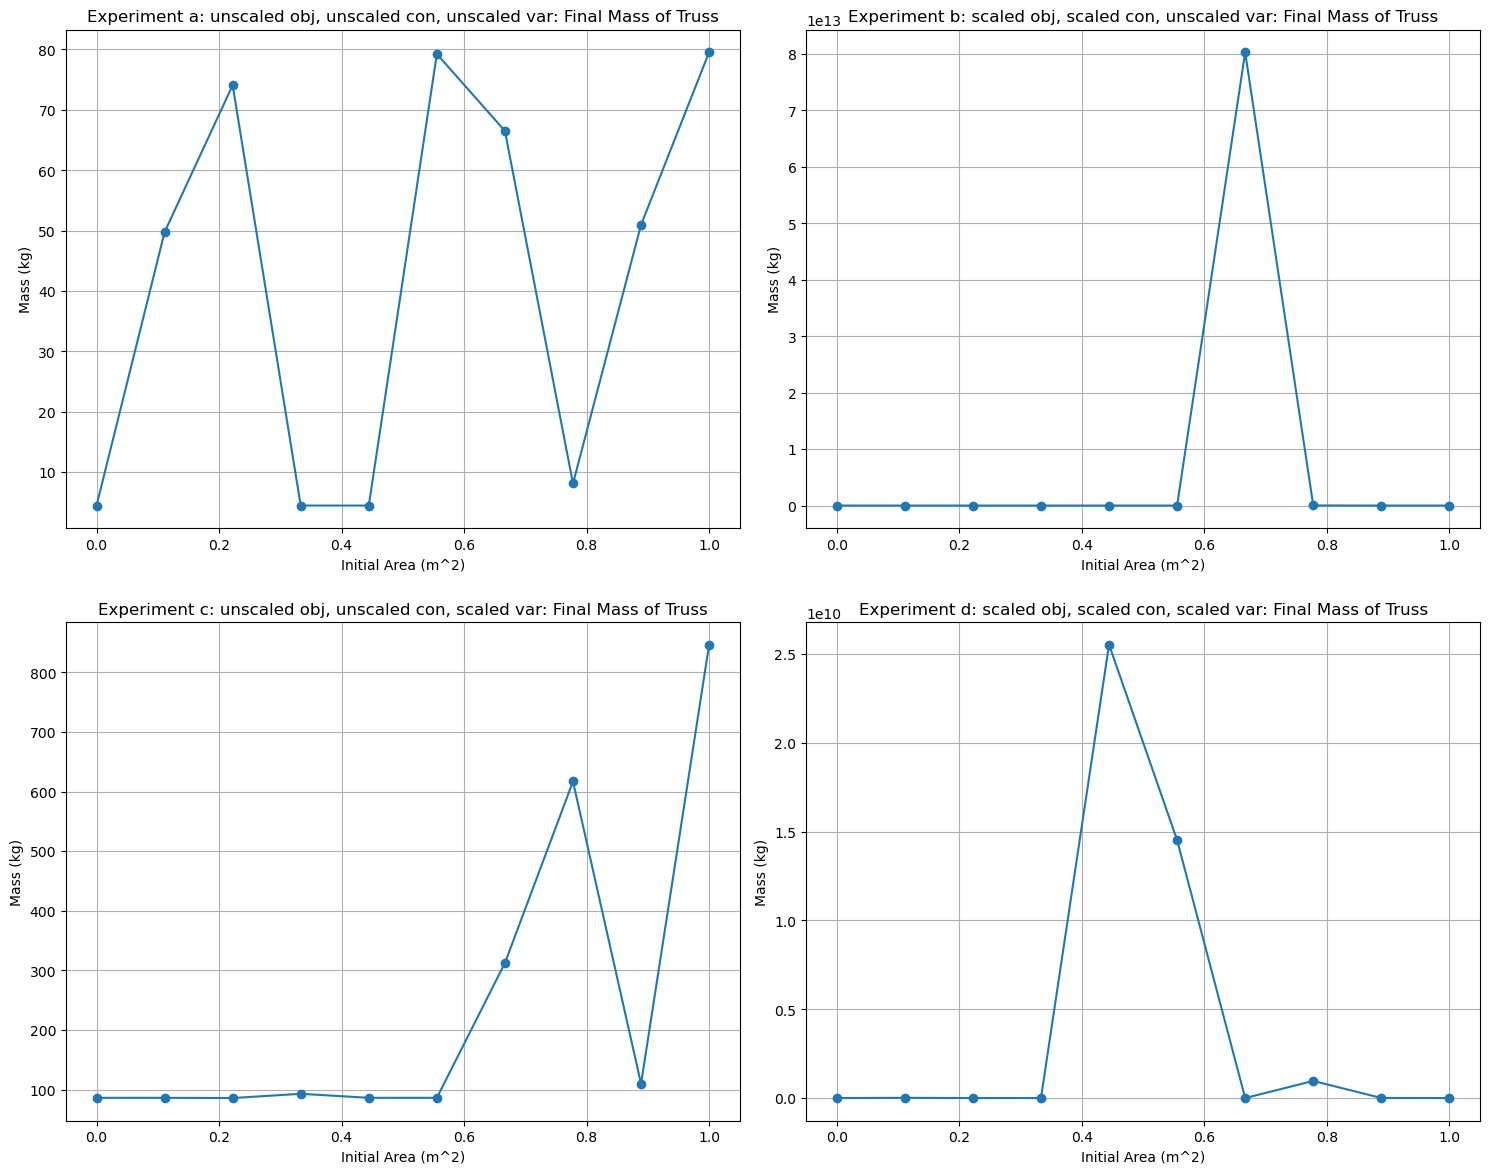

In [143]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
for i in range(4):
    axs[i].plot(A_init_grid, experiments[i]['mass'], 'o-')
    axs[i].set_title(f'Experiment {labels[i]}: Final Mass of Truss')
    axs[i].set_xlabel('Initial Area (m^2)')
    axs[i].set_ylabel('Mass (kg)')
    axs[i].grid(True)
plt.tight_layout()
plt.show()

The plot below shows the constraint violation. It seems that only one sub-experiment in experiment (c) satisfies both constraints simultaneously. That experiment produces an estimate of 100 kg total mass and total iteration at less than 40. 

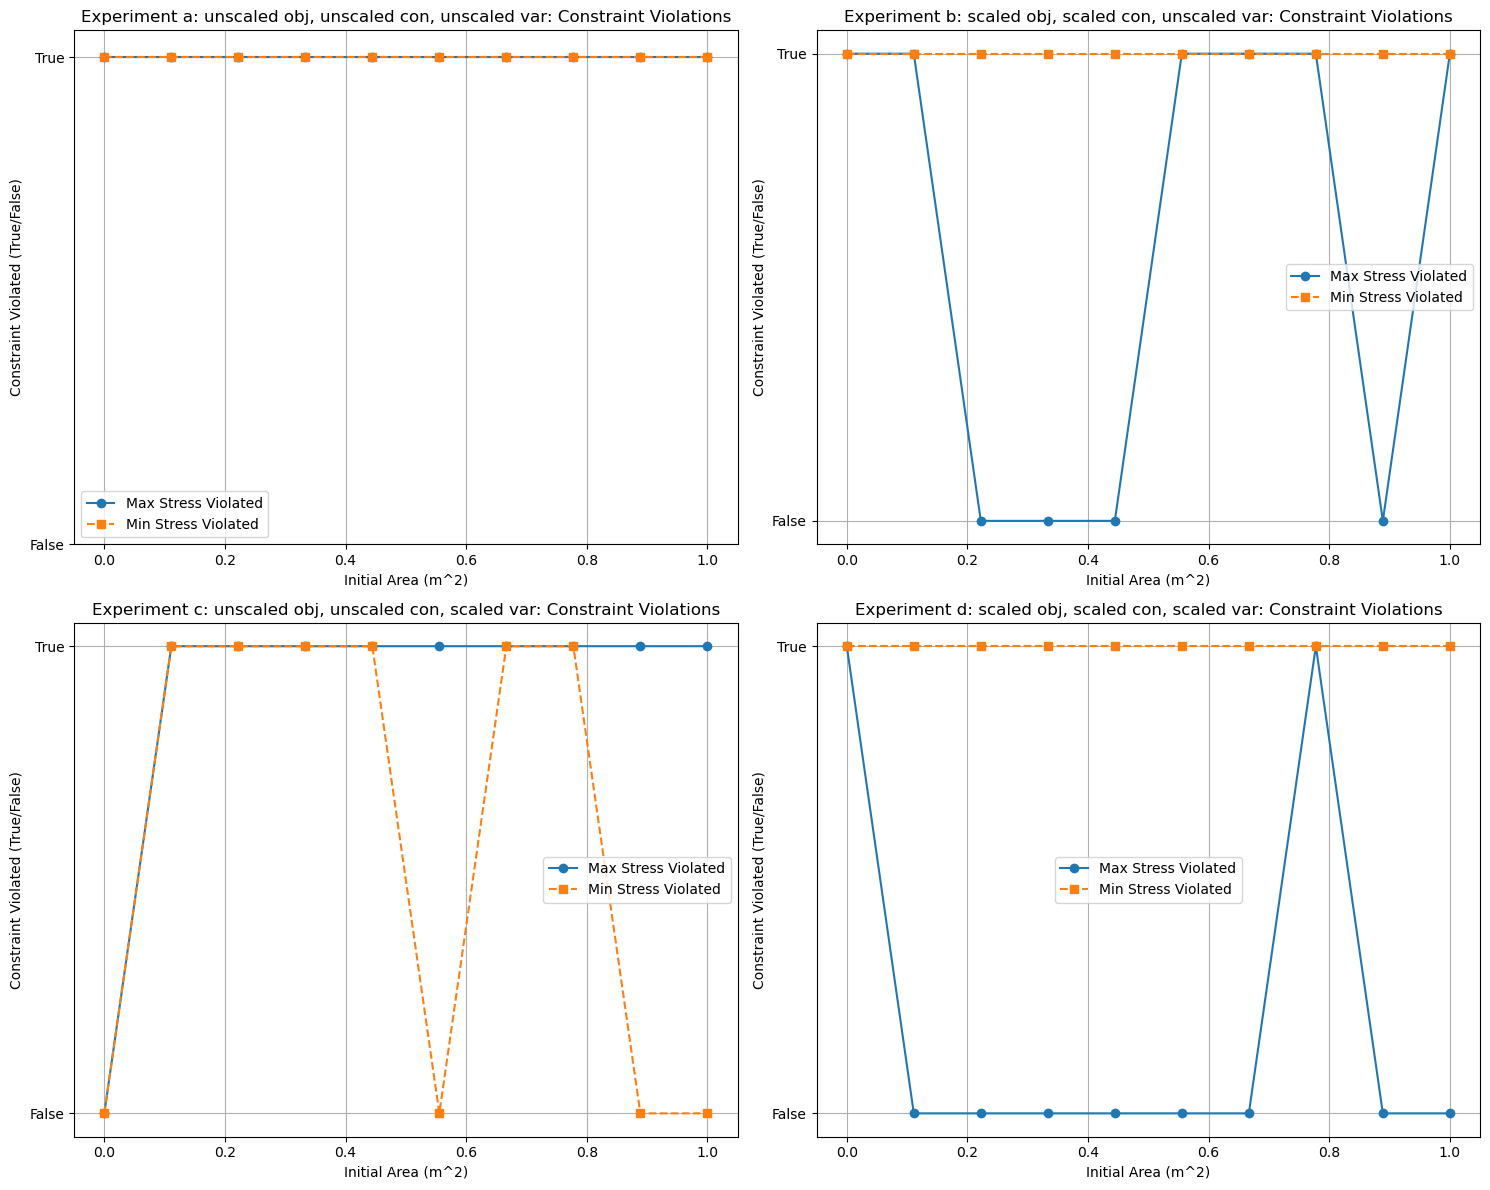

In [144]:
# plot the constraint violations
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()
for i in range(4):
    axs[i].plot(A_init_grid, experiments[i]['constraint_max_violated'], 'o-', label='Max Stress Violated')
    axs[i].plot(A_init_grid, experiments[i]['constraint_min_violated'], 's--', label='Min Stress Violated')
    axs[i].set_title(f'Experiment {labels[i]}: Constraint Violations')
    axs[i].set_xlabel('Initial Area (m^2)')
    axs[i].set_ylabel('Constraint Violated (True/False)')
    axs[i].set_yticks([0, 1])
    axs[i].set_yticklabels(['False', 'True'])
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

#### Part (e)

I am not confidently that my script is error-free. I would have hypothesized that using scaled constraints, objective, and design variable leads to the most robust optimization (e.g. least number of iteration and satistified constraints). From both three-bar truss and eleven-bar truss experiments, I would suggest to instead use only scaled design variable, while leaving other constraints unscaled. Remarkably, when constraint, objective, and variable are all scaled, we achieve the least satisfactory optimization results. I am tempted to doubt the legitimacy of this conclusion and that my scripts have errors hidden somewhere. I have not been successful in finding it, but hopeful my conclusion here shows the efforts.